# Analyzing Atrato's Portuguese Migrants 🇵🇹

In [65]:
from util import *
import pandas as pd, geopandas as gpd, seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objects as gp, numpy as np, pylab as pl
%matplotlib inline

In [66]:
df = pd.read_excel('data/atrato-data.xlsx',
                   converters={"naturality_place_id":str,"naturality_city_id": str,
                               "naturality_state_id":str,"passport_emission_id":str})
df = df[df.nationality=="Portuguese"].reset_index(drop=True)

### Total of Migrants

In [67]:
print("There were {} Portuguese migrants in Atrato's Boarding Lists.".format(len(df)))

There were 195 Portuguese migrants in Atrato's Boarding Lists.


### Embarkation

In [68]:
embarked = df.query("embarked == 'Yes'")
not_embarked = df.query("embarked == 'No'")
print("Out of the {} Portuguese in boarding lists:\n\t- {} embarked in the Port of Lisbon"
      " \n\t- {} did not embark, a solo traveler and a family"
      .format(len(df), len(embarked), len(not_embarked)))
print("\nAccording to the newspaper 'O Economista', published on Jan 8,"
      "the Port of Lisbon Police had the {} arrested because they tried to embark without passports. "
      "The family actually had a passport emited at the Civil Government of Vila Real, "
      "maybe they lost it before embarking or the information in it was false.".format(len(not_embarked)))

Out of the 195 Portuguese in boarding lists:
	- 189 embarked in the Port of Lisbon 
	- 6 did not embark, a solo traveler and a family

According to the newspaper 'O Economista', published on Jan 8,the Port of Lisbon Police had the 6 arrested because they tried to embark without passports. The family actually had a passport emited at the Civil Government of Vila Real, maybe they lost it before embarking or the information in it was false.


In [69]:
solo = embarked["solo_id"].dropna().astype(int).nunique()
families = embarked["family_id"].dropna().astype(int).nunique()
print("Passengers were made up of:\n\t- {} families\n\t- {} solo travelers"
      .format(families, solo))

Passengers were made up of:
	- 31 families
	- 85 solo travelers


### Tickets

In [70]:
paid= embarked.query("contract == 'Paid'")
c_locadora = 5 # It's unknow which passengers were the ones brought for Companhia Locadora
w_c_tait = embarked.query("contract == 'W.C. Tait'")
print("Regarding Passenger Tickets:\n\t- {} paid for the passenger tickets\n\t- {} were brought by William C. Tait & Cia.\n\t\t- {} with subsidized tickets\n\t\t- {} were single portuguese hired as servants by Companhia Locadora Previdência Doméstica\nAll of them were in 3rd Class/Steerage"
      .format(len(paid)-c_locadora, len(w_c_tait) + c_locadora, len(w_c_tait), c_locadora))

Regarding Passenger Tickets:
	- 98 paid for the passenger tickets
	- 91 were brought by William C. Tait & Cia.
		- 86 with subsidized tickets
		- 5 were single portuguese hired as servants by Companhia Locadora Previdência Doméstica
All of them were in 3rd Class/Steerage


## Subsidized Migrants
Analyzing the Demographics of Subsidized Portuguese Migrants

### Family, Gender and Civil Status
Subsidized Passengers were made up of 23 families and no solo travelers.

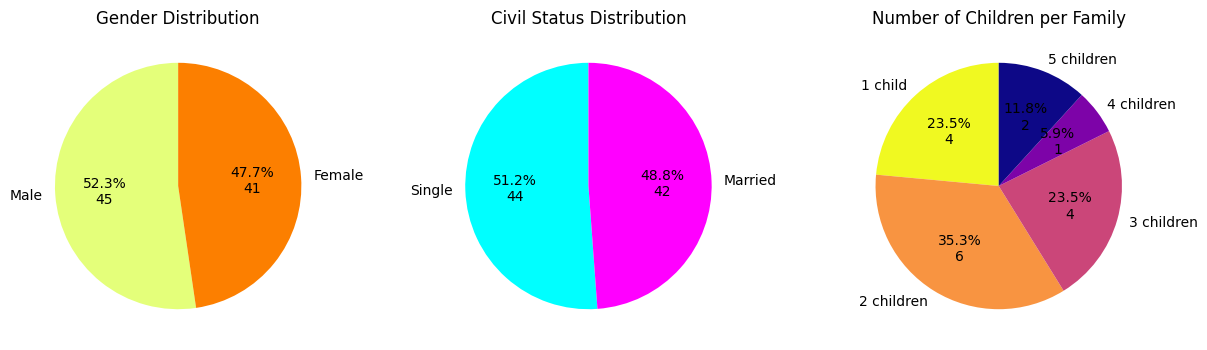

In [71]:
families = w_c_tait["family_id"].dropna().astype(int).nunique()
fig1, axes = plt.subplots(ncols=3)

gender = w_c_tait["gender"].to_frame("Gender").value_counts().to_frame("Total")
gender.plot.pie(title="Gender Distribution", figsize=(15,4), cmap="Wistia",y='Total',ylabel='',ax=axes[0],
                autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'.format(prct_value,len(w_c_tait)*prct_value/100)),
                shadow=False, startangle=90, labels=["Male","Female"]).get_legend().remove()

civil_status = w_c_tait["civil-status"].to_frame("Civil Status").value_counts().to_frame("Total")
civil_status.plot.pie(title="Civil Status Distribution", figsize=(15,4), cmap="cool", ax=axes[1],
                      autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'.format(prct_value,len(w_c_tait)*prct_value/100)),
                      shadow=False, startangle=90, labels=["Single","Married"], y='Total', ylabel='').get_legend().remove()

n_children = w_c_tait.query("role in ['Son','Daughter','Stepson','Stepdaughter']")
n_children = n_children['family_id'].value_counts().to_frame("Total")
num_children = n_children.reset_index(drop=True).value_counts().sort_index()
num_children.plot.pie(title="Number of Children per Family", figsize=(15,4), cmap="plasma_r", ax=axes[2],
                      autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'.format(prct_value,len(n_children)*prct_value/100)),
                      shadow=False, startangle=90,  labels=["1 child","2 children", "3 children", "4 children", "5 children"],
                      y='Total', ylabel='').get_legend()

### Age Pyramid

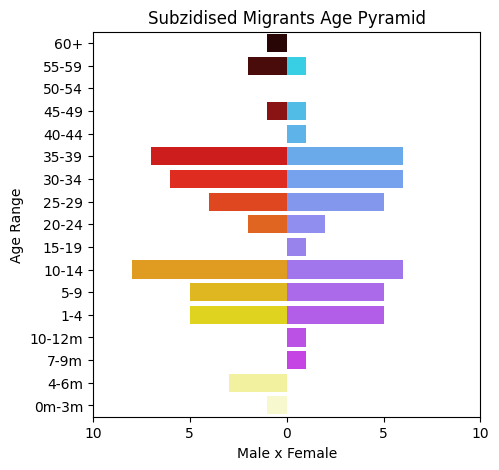

In [72]:
pyramid = generate_age_pyramid(w_c_tait)
plt.figure (figsize=(5,5))
male_axis = sns.barplot(x='male', y='age', data=pyramid, order=pyramid["age"], palette="hot")
female_axis = sns.barplot(x='female', y='age', data=pyramid, order=pyramid["age"], palette="cool")

plt.title("Subzidised Migrants Age Pyramid")
plt.xticks(ticks=[-10, -5, 0, 5, 10], labels=['10', '5','0', '5', '10'])
plt.xlabel("Male x Female"); plt.ylabel("Age Range");

### Naturality
The naturality of passangers brought by William C. Tait & Cia.:

#### Naturality per Distrito

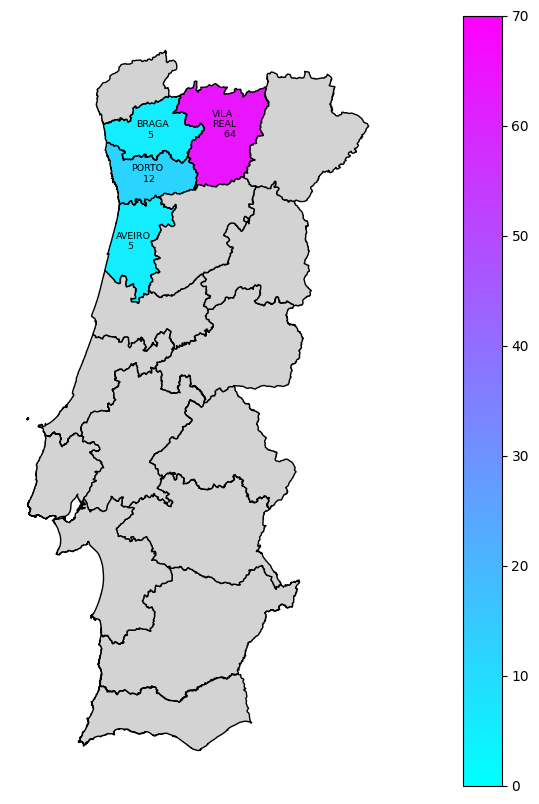

In [73]:
fig3, ax = plt.subplots()

distritos_map = generate_distritos_map(w_c_tait)
distritos_map.plot(column="count", cmap="cool",vmax=70, vmin=0, legend=True, ax=ax,
                   edgecolor="black", missing_kwds=dict(color="lightgrey", ))
generate_texts_distritos(distritos_map)

plt.axis("off"); plt.gcf().set_size_inches(20, 10)

#### Naturality per Concelho

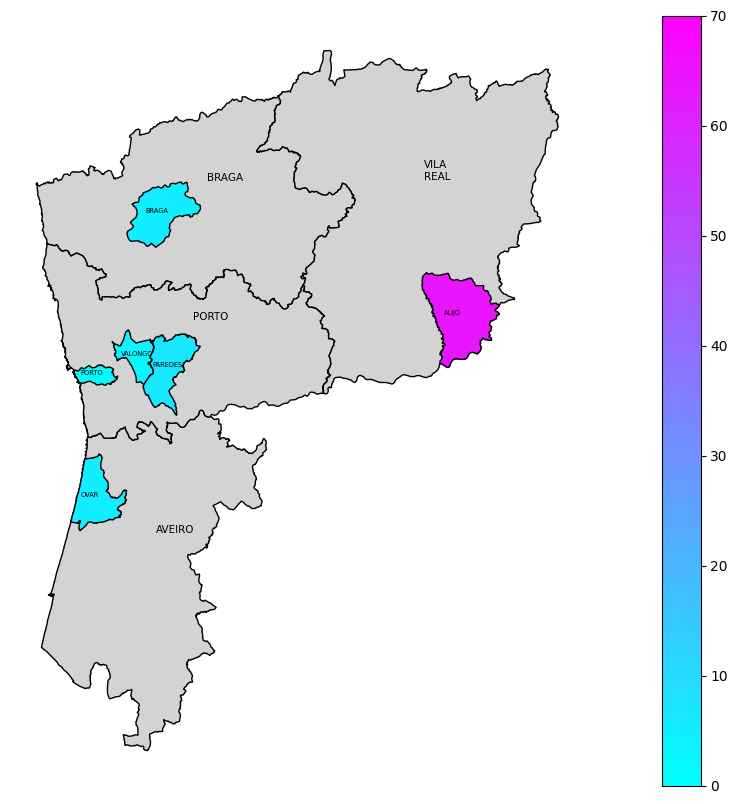

In [74]:
fig4, ax = plt.subplots()

distritos_concelhos_map = generate_distritos_map(w_c_tait,False)
concelhos_map = generate_concelhos_map(w_c_tait,False)
distritos_concelhos_map.plot(color="lightgrey", legend=True, edgecolor="black", ax=ax)
concelhos_map.plot(column="count", cmap="cool", vmax=70, vmin=0, ax=ax,
                   legend=True, edgecolor="black", missing_kwds=dict(color="lightgrey", ))
generate_texts_distrito_concelho(distritos_concelhos_map,concelhos_map)

plt.axis("off"); plt.gcf().set_size_inches(20, 10)

#### Naturality per Freguesia from the Concelho of Alijó

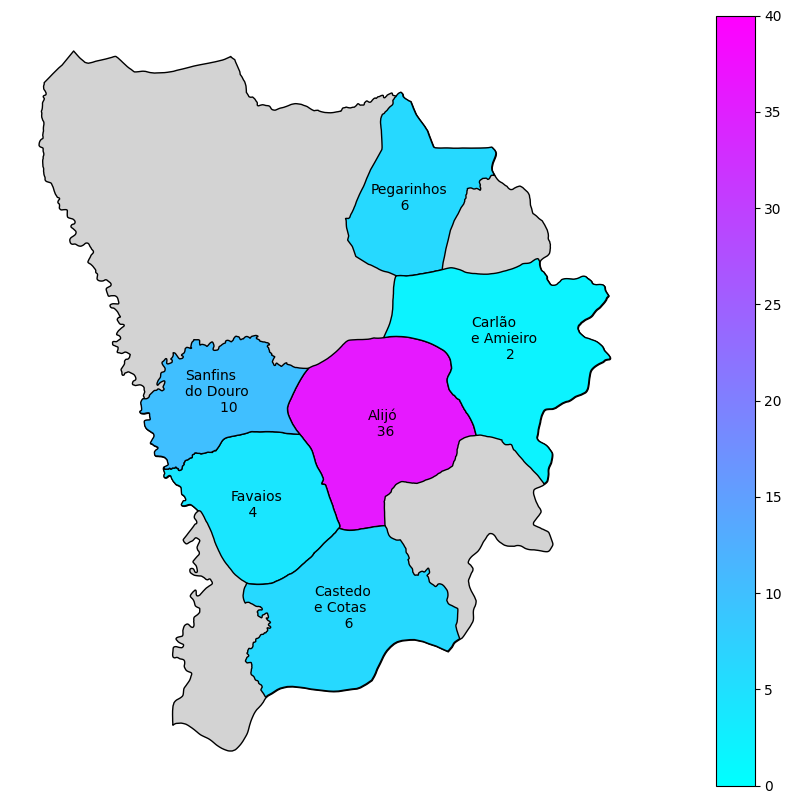

In [75]:
fig5, ax = plt.subplots()

alijo = w_c_tait.query("naturality_city == 'Alijó'")
alijo_concelhos_map = generate_concelhos_map(alijo,False)
alijo_freguesias_map = generate_freguesias_map(alijo,False)
alijo_concelhos_map.plot(color="lightgrey", legend=True, edgecolor="black", ax=ax)
alijo_freguesias_map.plot(column="count", cmap="cool",vmax=40, vmin=0, legend=True, ax=ax,
                          edgecolor="black", missing_kwds=dict(color="lightgrey", ))
generate_texts_alijo(alijo_freguesias_map)

plt.axis("off"); plt.gcf().set_size_inches(20, 10)

### Passaports
All passengers had their passports emited in the Governo Civil from their Distritos

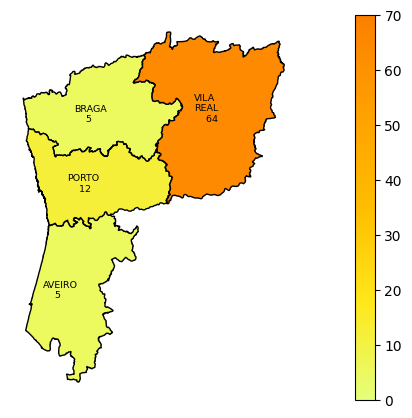

In [76]:
fig6, ax = plt.subplots()
plt.gcf().set_size_inches(15, 5)

passport_map = generate_passport_map(w_c_tait)
passport_map.plot(column = "count",cmap="Wistia", vmax=70, vmin=0, ax=ax,
                   legend=True, edgecolor="black", missing_kwds= dict(color = "lightgrey",))
generate_texts_distritos(passport_map)
plt.axis("off")
plt.show()

,passport_date,Vila Real,Braga,Aveiro,Porto
3,1889-11-16,2.0,NaN,NaN,NaN
2,1889-11-27,4.0,NaN,NaN,NaN
1,1889-12-20,5.0,NaN,NaN,NaN
5,1889-12-21,NaN,NaN,NaN,3.0
4,1889-12-23,NaN,NaN,2.0,NaN
0,1890-01-02,5.0,1.0,NaN,NaN
6,1890-01-04,NaN,NaN,NaN,1.0


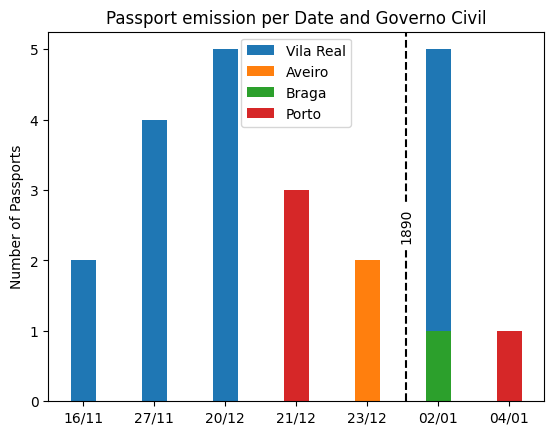

In [80]:
bearers = w_c_tait.query("role == 'Bearer'")
passports = generate_passport_bar(bearers)
display(passports)

fig7, ax = plt.subplots()
labels = ['16/11','27/11','20/12','21/12','23/12','02/01','04/01']
width = 0.35
ax.bar(labels, passports['Vila Real'], width, label='Vila Real')
ax.bar(labels, passports['Aveiro'], width, label='Aveiro')
ax.bar(labels, passports['Braga'], width, label='Braga')
ax.bar(labels, passports['Porto'], width, label='Porto')
ax.set_ylabel('Number of Passports')
ax.set_title('Passport emission per Date and Governo Civil')
ax.legend()
plt.axvline(x = 4.55, color = 'black', linestyle='dashed')
plt.text(4.55, 2.5, '1890', ha='center', va='center',rotation='vertical', backgroundcolor='white')
plt.show()